In [3]:
import pandas as pd
import numpy as np

num_topics = 26
df = pd.read_csv(f"~/Desktop/R_js/data/beta/pro{num_topics}_beta.csv")

display(df.head())
print(df.shape)

,topic,term,beta
0,1,1_hour_break,3.672673e-208
1,2,1_hour_break,1.351000e-189
2,3,1_hour_break,8.675901e-213
3,4,1_hour_break,4.690151e-197
4,5,1_hour_break,6.897081e-192


(172666, 3)


## Computing topic word distribution

In [4]:
topic_word_distr = []
imp_words = []
terms = df[df.topic == 1].term.values.tolist()

num_topics = len(df.topic.unique())
for i in range(1, num_topics+1):
    topic = df[df.topic == i] 
    vals = topic.beta.values.tolist()
    topic_word_distr += [np.asarray(vals)]
    words = [terms[i] for i in np.asarray(vals).argsort()[-10:][::-1].tolist()]
    imp_words.append(words)
    
print(len(topic_word_distr))
print(len(imp_words))


26
26


In [10]:
print(topic_word_distr)

[array([0.       , 0.       , 0.       , ..., 0.       , 0.       ,
       0.0005838]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.        , 0.        , ..., 0.00101968, 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.01821095, 0.        , ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.0002145 , 0.        , 0.00235947, ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0

# Dissimilarity Measure

In [3]:
from scipy.spatial import distance
# import scipy

dist = []
for i in range(num_topics): 
    t1 = topic_word_distr[i]
    d1 = []
    for j in range(num_topics):
        t2 = topic_word_distr[j]
        d = distance.jensenshannon(t1, t2)
        d1.append(d)
    dist.append(d1)

print(dist)

AttributeError: module 'scipy.spatial.distance' has no attribute 'jensenshannon'

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
import math

cos_sim = cosine_similarity(topic_word_distr, topic_word_distr)
# cos_sim = [['{:f}'.format(item) for item in item_array] for item_array in cos_sim]
# cos_sim = np.array(cos_sim)
np.set_printoptions(suppress=True)
cos_sim = np.round(cos_sim, 2)
print((len(cos_sim[0])))

26


# Hierarchical Clustering

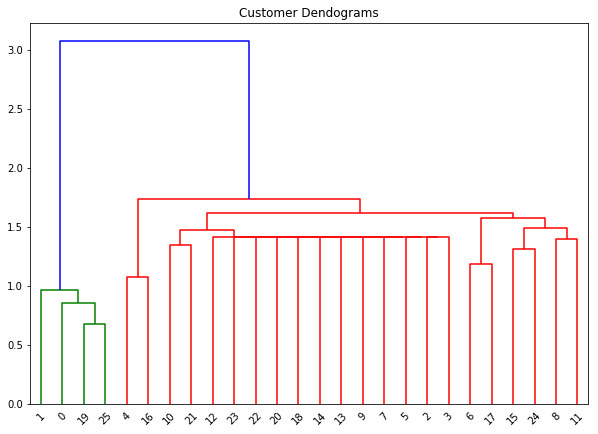

In [9]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(cos_sim, method='ward'))

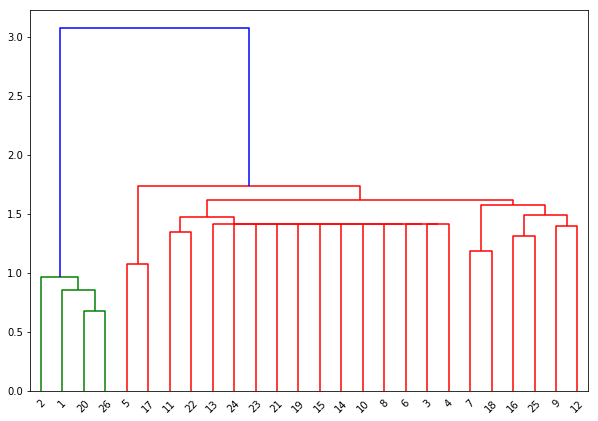

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(cos_sim, 'ward')

labelList = range(1, 27)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            show_leaf_counts=True)
plt.show()

# Dimensionality Reduction

## TSNE

In [22]:
# Clustering
from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2)
tsne = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
X_tsne = tsne.fit_transform(topic_word_distr)

[t-SNE] Computing 23 nearest neighbors...
[t-SNE] Indexed 24 samples in 0.000s...
[t-SNE] Computed neighbors for 24 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 24 / 24
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.275330
[t-SNE] KL divergence after 1000 iterations: 0.406346


## PCA

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# X_tsne = pca.fit_transform(dist)
X_tsne = pca.fit_transform(topic_word_distr)



# Visualization

In [1]:
# Generate random colors

import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
colormap = np.asarray(get_colors(num_topics)) 
print(colormap)

NameError: name 'np' is not defined

In [24]:
df_cluster = pd.DataFrame()
df_cluster['X_tsne'] = X_tsne[:, 0]
df_cluster['Y_tsne'] = X_tsne[:, 1]
df_cluster['Topic'] = range(num_topics)
df_cluster['Topic_words'] = imp_words

cluster_colors = dict()
for c in range(num_topics): 
    cluster_colors[c] = colormap[c]
    
df_cluster['Colors'] = df_cluster['Topic'].apply(lambda l: cluster_colors[l])
df_cluster.sort_values(by=['Topic'], inplace=True)

display(df_cluster.head())

,X_tsne,Y_tsne,Topic,Topic_words,Colors
0,161.458557,453.956940,0,"[cultur, salari, start, structur, competit, in...",#afd3c4
1,259.606354,60.705025,1,"[leadership, skill, travel, intern, develop, s...",#571eaf
2,105.171638,139.197876,2,"[difficult, system, forc, hot, cold, live, tec...",#6f0369
3,44.158051,302.699463,3,"[worker, extrem, heavi, workload, qualiti, lif...",#9b85b4
4,14.249448,-9.034382,4,"[hour, day, shift, sometim, call, home, cut, c...",#9ba9a6


In [25]:
from bokeh.plotting import figure, show, output_notebook, save#, output_file
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
output_notebook()

Loading BokehJS ...

In [26]:
source = ColumnDataSource(dict(
    x=df_cluster['X_tsne'],
    y=df_cluster['Y_tsne'],
    color=df_cluster['Colors'],
    label=df_cluster['Topic'],
    topic_words = df_cluster["Topic_words"]
))

In [27]:
title = 'T-SNE visualization of topics'

plot_lda = figure(plot_width=1000, plot_height=700,
                     title=title, tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
                     x_axis_type=None, y_axis_type=None, min_border=1)

plot_lda.scatter(x='x', y='y',  legend='label', source=source,
                 color='color', alpha=0.8)#'msize', )

# hover tools
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips = { "Topic": "@label  <br> Topic_words: @topic_words "}
plot_lda.legend.location = "top_left"

show(plot_lda)

## Combine Pro and Cons model


In [3]:
import pandas as pd
import numpy as np

# num_topics_pro = 8
num_topics_pro = 26

df_pro = pd.read_csv(f"~/Desktop/R_js/data/beta/pro{num_topics_pro}_beta.csv")

# num_topics_con = 10
num_topics_con = 24

df_con = pd.read_csv(f"~/Desktop/R_js/data/beta/con{num_topics_con}_beta.csv")

display(df_pro.head())
display(df_pro.shape)

display(df_con.head())
display(df_con.shape)

,topic,term,beta
0,1,1_hour_break,3.672673e-208
1,2,1_hour_break,1.351000e-189
2,3,1_hour_break,8.675901e-213
3,4,1_hour_break,4.690151e-197
4,5,1_hour_break,6.897081e-192


(172666, 3)

,topic,term,beta
0,1,’_care,8.624717e-100
1,2,’_care,2.555270e-93
2,3,’_care,1.219269e-114
3,4,’_care,3.194975e-91
4,5,’_care,7.375773e-119


(154080, 3)

In [4]:
pro_terms = df_pro[df_pro.topic == 1]["term"].values.tolist()
con_terms = df_con[df_con.topic == 1]["term"].values.tolist()

pro_con = list(set(pro_terms) & set(con_terms))
print(len(pro_con))
print(pro_con)

2096
['decis', 'cardin_health', 'manag_advanc', 'spread', 'break_30_min', 'local', 'heath', 'encourag', 'sleep', 'renew', 'advantag', 'minim', 'addit', 'attempt', 'data', 'street', 'measur', 'strategi', 'cook', 'player', 'horribl', 'target', 'occasion', 'line_manag', 'express', 'requir', 'line', 'coke', 'inhous', 'insur_employe', 'appreci', 'grant', 'corp', 'reward', 'opportun', 'weather', 'amongst', 'snow', 'break_4_hour', 'belong', 'fmla', 'tool', 'hour_lot', 'doubl', 'wasnt', 'talent', 'success', 'fast', 'peopl_cultur', 'pay', 'growth_potenti', 'employess', 'repres', 'morn_shift', 'interact', 'didnt', 'commit', 'incred', 'comput', 'paid', 'minimum', 'line_busi', 'track', 'hardwork', 'easili', 'phoenix', 'pay_incent', 'overtim', 'refriger', 'manag_pay', 'citigroup', 'cloud', 'schedul_break', 'major_holiday', 'award', 'eventu', 'simpl', 'opportunit', 'coach', 'execut', 'supervis', 'tuition', 'mainten', 'pay_rate', 'prospect', 'kroger', 'produc', 'pound', 'medic', 'digit', 'technician'

In [5]:
just_pro = list(set(pro_terms) - set(con_terms))
just_con = list(set(con_terms) - set(pro_terms))


print(len(just_pro) + len(just_con) + 2*len(pro_con))
print(len(pro_terms) + len(con_terms))

13061
13061


In [6]:

n = len(just_con)
for i in range(1, num_topics_pro+1):
    topic = np.full(n, i)
    beta = np.full(n, 0)
    df_temp = pd.DataFrame()
    df_temp["topic"] = topic
    df_temp["term"] = just_con
    df_temp["beta"] = beta
    df_pro = pd.concat([df_pro, df_temp], ignore_index=True, sort=False)
    
n = len(just_pro)
for i in range(1, num_topics_con+1):
    topic = np.full(n, i)
    beta = np.full(n, 0)
    df_temp = pd.DataFrame()
    df_temp["topic"] = topic
    df_temp["term"] = just_pro
    df_temp["beta"] = beta
    df_con = pd.concat([df_con, df_temp], ignore_index=True, sort=False)
    
    
df_pro["procon"] = "pro"
df_pro["color"] = "#c67f1f"
df_con["procon"] = "con"
df_con["color"] = "#20e560"

display(df_pro.head())
display(df_con.head())

,topic,term,beta,procon,color
0,1,1_hour_break,3.672673e-208,pro,#c67f1f
1,2,1_hour_break,1.351000e-189,pro,#c67f1f
2,3,1_hour_break,8.675901e-213,pro,#c67f1f
3,4,1_hour_break,4.690151e-197,pro,#c67f1f
4,5,1_hour_break,6.897081e-192,pro,#c67f1f


,topic,term,beta,procon,color
0,1,’_care,8.624717e-100,con,#20e560
1,2,’_care,2.555270e-93,con,#20e560
2,3,’_care,1.219269e-114,con,#20e560
3,4,’_care,3.194975e-91,con,#20e560
4,5,’_care,7.375773e-119,con,#20e560


In [7]:
df = pd.concat([df_pro, df_con], ignore_index=True, sort=False)


In [8]:
print(df_pro.term.nunique())
print(df_con.term.nunique())

t26 = df[(df.topic==26) & (df.procon=="pro")].term.nunique()
print(t26)

10965
10965
10965


## Computing topic word distribution

In [9]:
topic_word_distr = []
imp_words = []
pro_con = []
color = []
terms = df[(df.topic == 1) & (df.procon == "pro")].term.values.tolist()


for i in range(1, num_topics_pro+1):
    topic = df[(df.topic == i) & (df.procon == "pro")] 
    vals = topic.beta.values.tolist()
    topic_word_distr += [np.asarray(vals)]
    words = [terms[i] for i in np.asarray(vals).argsort()[-10:][::-1].tolist()]
    imp_words.append(words)
    pro_con.append("pro")
    color.append("#05890D")

for i in range(1, num_topics_con+1):
    topic = df[(df.topic == i) & (df.procon == "con")] 
    vals = topic.beta.values.tolist()
    topic_word_distr += [np.asarray(vals)]
    words = [terms[i] for i in np.asarray(vals).argsort()[-10:][::-1].tolist()]
    imp_words.append(words)
    pro_con.append("con")
    color.append("#F42F04")

    
print(len(topic_word_distr))
print(len(imp_words))

50
50


# Dissimilarity Measure


In [14]:
from scipy.spatial import distance

dist = []
tot_topics = num_topics_pro + num_topics_con
for i in range(tot_topics): 
    t1 = topic_word_distr[i]
    d1 = []
    for j in range(tot_topics):
        t2 = topic_word_distr[j]
        d = distance.jensenshannon(t1, t2)
        d1.append(d)
    dist.append(d1)

print(dist)

AttributeError: module 'scipy.spatial.distance' has no attribute 'jensenshannon'

# Dimensionality Reduction

## TSNE


In [42]:
# Clustering
from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2)
tsne = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
X_tsne = tsne.fit_transform(topic_word_distr)

[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 50 samples in 0.001s...
[t-SNE] Computed neighbors for 50 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 0.161373
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.419525
[t-SNE] KL divergence after 1000 iterations: 0.509217


## PCA

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_tsne = pca.fit_transform(topic_word_distr)
# X_tsne = pca.fit_transform(dist)

# Visualization

In [16]:
df_cluster = pd.DataFrame()
df_cluster['X_tsne'] = X_tsne[:, 0]
df_cluster['Y_tsne'] = X_tsne[:, 1]
df_cluster['Topic'] = range(1, tot_topics+1)
df_cluster['Topic_words'] = imp_words
df_cluster['pro_con'] = pro_con
df_cluster['color'] = color


In [17]:
from bokeh.plotting import figure, show, output_notebook, save#, output_file
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
output_notebook()

Loading BokehJS ...

In [18]:
source = ColumnDataSource(dict(
    x=df_cluster['X_tsne'],
    y=df_cluster['Y_tsne'],
    color=df_cluster['color'],
    label=df_cluster['Topic'],
    topic_words = df_cluster["Topic_words"],
    pro_con = df_cluster["pro_con"]
))

In [20]:
title = 'PCA visualization of topics'

plot_lda = figure(plot_width=1000, plot_height=700,
                     title=title, tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
                     x_axis_type=None, y_axis_type=None, min_border=1)

plot_lda.scatter(x='x', y='y',  legend='pro_con', source=source,
                 color='color', alpha=0.8, fill_alpha=.3, radius=.02)#'msize', )

# hover tools
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips = { "Topic": "@label (@pro_con)  <br> Topic_words: @topic_words "}
plot_lda.legend.location = "top_left"

show(plot_lda)